<a href="https://colab.research.google.com/github/saga743k/Deep-Learning-Experiments/blob/main/Ex_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.6983 - loss: 0.8362 - val_accuracy: 0.8633 - val_loss: 0.3722
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 64ms/step - accuracy: 0.8545 - loss: 0.4006 - val_accuracy: 0.8743 - val_loss: 0.3339
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.8736 - loss: 0.3463 - val_accuracy: 0.8922 - val_loss: 0.2923
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 87s 71ms/step - accuracy: 0.8873 - loss: 0.3051 - val_accuracy: 0.8933 - val_loss: 0.2859
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - accuracy: 0.8954 - loss: 0.2833 - val_accuracy: 0.9007 - val_loss: 0.2678
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 66ms/step - accuracy: 0.9065 - loss: 0.2548 - val_accuracy: 0.9057 - val_loss: 0.2616
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.9100 - loss: 0.2482 - val_accuracy: 0.9030 - val_loss: 0.2588
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 67ms/step - accuracy: 0.9144 - loss: 0.2333 - 

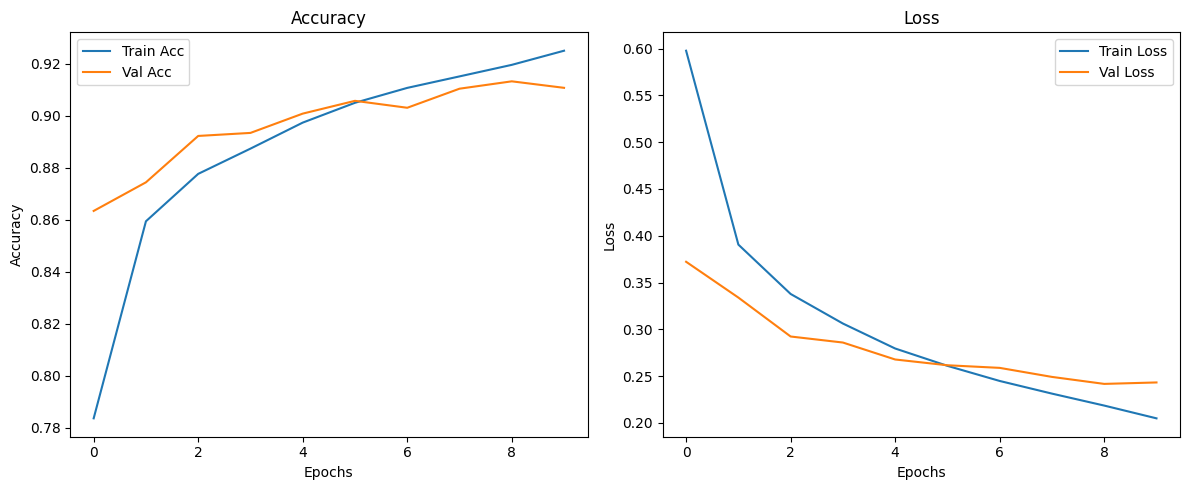

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


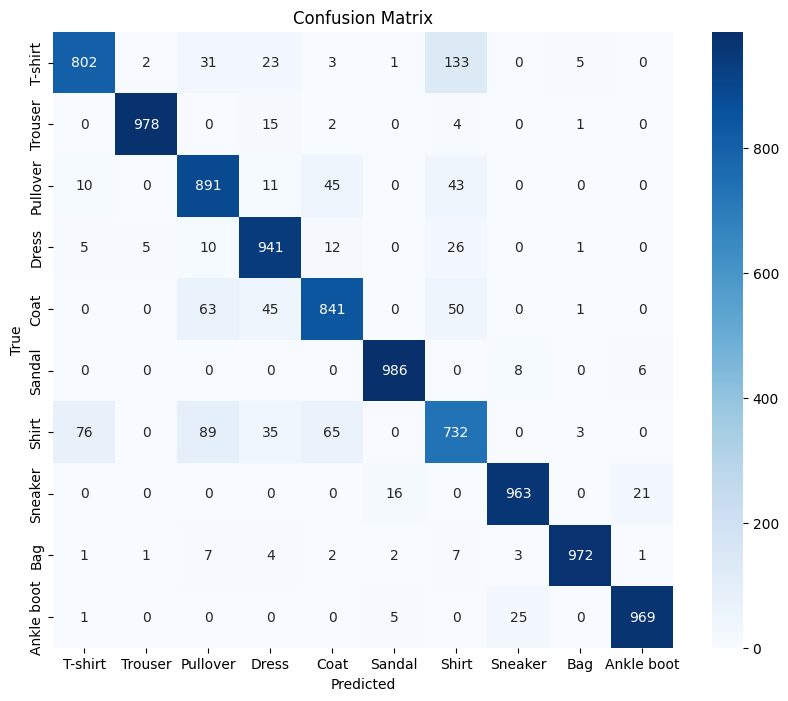


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.89      0.85      1000
           3       0.88      0.94      0.91      1000
           4       0.87      0.84      0.85      1000
           5       0.98      0.99      0.98      1000
           6       0.74      0.73      0.73      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [1]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Load Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Step 3: Preprocess the Data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Step 4: Create CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

# Step 5: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the Model
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.2)

# Step 7: Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Step 8: Plot Accuracy and Loss Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 9: Confusion Matrix & Classification Report
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
    'T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
], yticklabels=[
    'T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
